# Capital Asset Pricing Model

# Project Summary
This project explores the relationship between the daily returns of selected stocks and the broader market (S&P 500) using the Capital Asset Pricing Model (CAPM). The model helps estimate each stock’s systematic risk (beta) and abnormal return (alpha).

# 📈 CAPM Stock Analysis with Python

This project uses the **Capital Asset Pricing Model (CAPM)** to analyze the relationship between the daily returns of selected stocks and the broader market index (**S&P 500**).

The goal is to calculate and visualize each stock’s **beta** (systematic risk) and **alpha** (abnormal return) using historical data and scatter plot regression.

---

## 📁 Project Structure

- `CAPM.ipynb`: Jupyter notebook containing the full analysis and visualizations.
- `data/`: CSV files of stock prices and S&P 500 index.
- `plots/`: Saved scatter plots of returns vs. market returns.

---

## 📊 What This Project Does

- Fetches or uses daily adjusted closing prices of 5 stocks and the S&P 500.
- Calculates **daily percentage returns**.
- Visualizes the relationship between each stock’s returns and the market's returns using **scatter plots and regression lines**.
- Computes **beta (slope)** and **alpha (intercept)** for each stock.

---

## 🔍 Key Insights

- Most stocks show a **strong linear correlation** with the S&P 500, confirming the CAPM assumption that market risk drives returns.
- **Beta > 1** → Stock is more volatile than the market.
- **Beta < 1** → Stock is less volatile than the market.
- **Positive alpha** indicates outperformance relative to CAPM expectations.

---

## ✅ Conclusion

This project shows how the CAPM model can be used to understand and quantify stock risk in relation to the broader market. The results can help in:
- Evaluating investment risk
- Comparing stock sensitivity to market changes
- Building a risk-aware portfolio

---

## 🚀 Future Improvements

- Compute Sharpe Ratios to assess risk-adjusted returns
- Include cumulative returns vs. market performance
- Create a summary table of alpha, beta, and R² for each stock

---

## 🛠️ Tools Used

- Python
- NumPy
- pandas
- Matplotlib / Plotly
- Jupyter Notebook

---



In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt

In [28]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [29]:
#Load the dataset

stock_df = pd.read_csv("CAPM Data.csv")

stock_df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [30]:
stock_df.shape

(2159, 10)

In [31]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [32]:
stock_df.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

In [33]:
stock_df = stock_df.sort_values (by = "Date")

stock_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [34]:
# Function to normalize prices

def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/ x[i][0]
    return x

In [35]:
normalized_stock_df = normalize(stock_df)
normalized_stock_df

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

In [36]:
#Plot an interactive visual using plotly express

def interactive_plot(df, title):
    fig = px.line(title= title )
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date']  , y=df[i]  , name = i )
    fig.show()

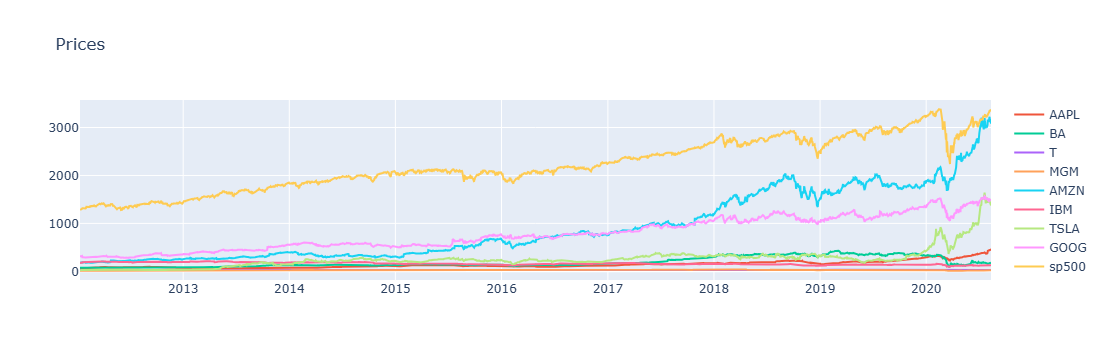

In [37]:
interactive_plot(stock_df, 'Prices') #Visual of original stock data

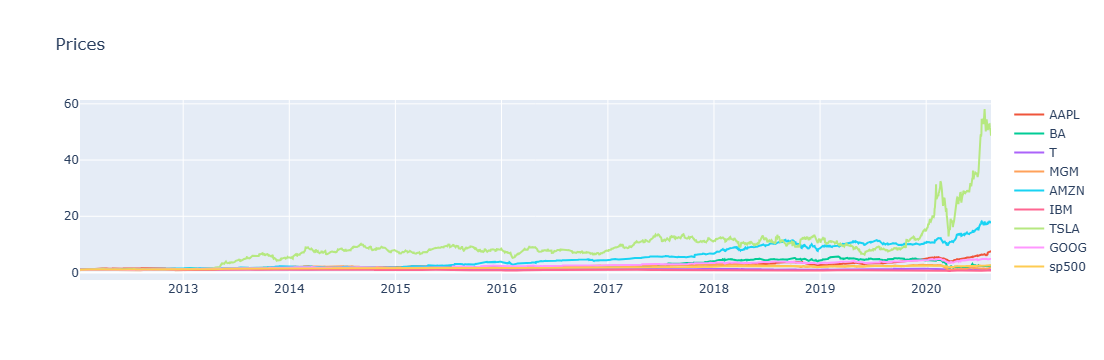

In [38]:
interactive_plot(normalized_stock_df, 'Prices') #Visual of normalized stock data

In [39]:
#Calculate Daily Returns

Daily_Returns = normalized_stock_df.drop(columns = ['Date']).pct_change()*100

Daily_Returns

AAPL        BA         T        MGM      AMZN       IBM       TSLA  \
0          NaN       NaN       NaN        NaN       NaN       NaN        NaN   
1    -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869 -19.327430   
2     1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852  16.717854   
3     1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   0.789470   
4    -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752  -0.186494   
...        ...       ...       ...        ...       ...       ...        ...   
2154  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917  -0.133153   
2155  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   0.307062   
2156 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762  -2.475194   
2157  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552  -2.350092   
2158 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220  -3.114399   

          GOOG     sp500  
0          NaN       NaN  
1    -0.738516 -0.494792  
2     0.574410  0.355295  
3     0.688856  1.110793  
4     1.052283  0.493866  
...        ...       ...  
2154  0.589774  0.642974  
2155  1.797626  0.642770  
2156 -0.373974  0.063303  
2157  0.107728  0.274222  
2158 -1.054744 -0.796913  

[2159 rows x 9 columns]

In [40]:
Daily_Returns['Date'] = stock_df['Date']

In [41]:
cols = ['Date'] + [col for col in Daily_Returns.columns if col != 'Date']
Daily_Returns = Daily_Returns[cols]

In [42]:
Daily_Returns

Date      AAPL        BA         T        MGM      AMZN       IBM  \
0     2012-01-12       NaN       NaN       NaN        NaN       NaN       NaN   
1     2012-01-13 -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869   
2     2012-01-17  1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852   
3     2012-01-18  1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   
4     2012-01-19 -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752   
...          ...       ...       ...       ...        ...       ...       ...   
2154  2020-08-05  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917   
2155  2020-08-06  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   
2156  2020-08-07 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762   
2157  2020-08-10  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552   
2158  2020-08-11 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220   

           TSLA      GOOG     sp500  
0           NaN       NaN       NaN  
1    -19.327430 -0.738516 -0.494792  
2     16.717854  0.574410  0.355295  
3      0.789470  0.688856  1.110793  
4     -0.186494  1.052283  0.493866  
...         ...       ...       ...  
2154  -0.133153  0.589774  0.642974  
2155   0.307062  1.797626  0.642770  
2156  -2.475194 -0.373974  0.063303  
2157  -2.350092  0.107728  0.274222  
2158  -3.114399 -1.054744 -0.796913  

[2159 rows x 10 columns]

In [43]:
Average_Daily_Return_SP500 = Daily_Returns['sp500'].mean()
print(f"The average daily return of S&P 500 is {Average_Daily_Return_SP500}")

The average daily return of S&P 500 is 0.049338859244782506


In [44]:
Average_Daily_Return_GOOG = Daily_Returns['GOOG'].mean()
print(f"The average daily return of GOOGLE is {Average_Daily_Return_GOOG}")

The average daily return of GOOGLE is 0.08443092985092478


In [45]:
Average_Daily_Return_GOOG > Average_Daily_Return_SP500

True

In [46]:
# Step 1: Set the correct date in the first row
Daily_Returns.at[0, 'Date'] = '2012-01-12'

# Step 2: Remove the column labeled 0
if 0 in Daily_Returns.columns:
    Daily_Returns = Daily_Returns.drop(columns=[0])

In [47]:
Daily_Returns

Date      AAPL        BA         T        MGM      AMZN       IBM  \
0     2012-01-12       NaN       NaN       NaN        NaN       NaN       NaN   
1     2012-01-13 -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869   
2     2012-01-17  1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852   
3     2012-01-18  1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   
4     2012-01-19 -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752   
...          ...       ...       ...       ...        ...       ...       ...   
2154  2020-08-05  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917   
2155  2020-08-06  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   
2156  2020-08-07 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762   
2157  2020-08-10  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552   
2158  2020-08-11 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220   

           TSLA      GOOG     sp500  
0           NaN       NaN       NaN  
1    -19.327430 -0.738516 -0.494792  
2     16.717854  0.574410  0.355295  
3      0.789470  0.688856  1.110793  
4     -0.186494  1.052283  0.493866  
...         ...       ...       ...  
2154  -0.133153  0.589774  0.642974  
2155   0.307062  1.797626  0.642770  
2156  -2.475194 -0.373974  0.063303  
2157  -2.350092  0.107728  0.274222  
2158  -3.114399 -1.054744 -0.796913  

[2159 rows x 10 columns]

In [59]:
Daily_Returns['AAPL']

0            NaN
1      -0.374946
2       1.164812
3       1.038382
4      -0.316937
          ...   
2154    0.362467
2155    3.488923
2156   -2.449458
2157    1.453480
2158   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [49]:
Daily_Returns['sp500']

0            NaN
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

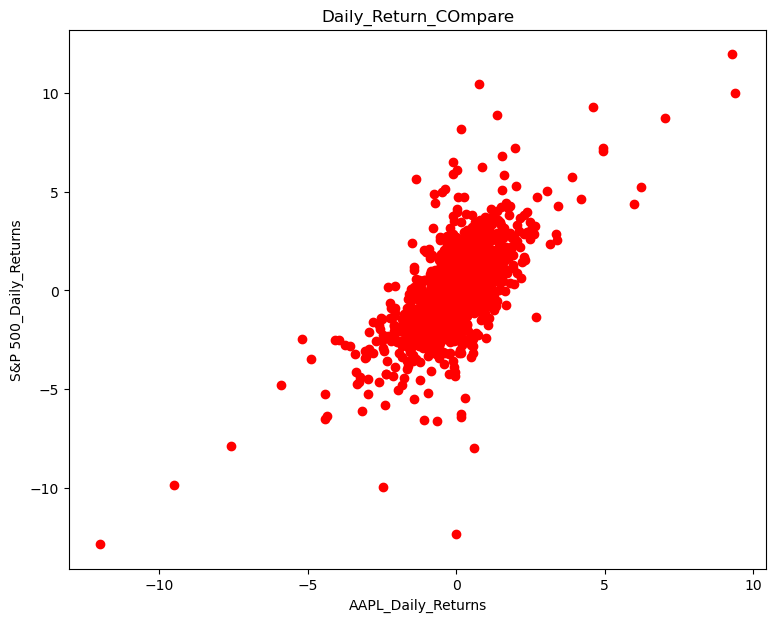

In [50]:
#plot scatter plot between selected stock and S&P 500 (Market)

plt.figure(figsize = (9,7))
plt.scatter(x = Daily_Returns['sp500'] , y= Daily_Returns['AAPL'] , color = 'red')
plt.xlabel('AAPL_Daily_Returns')
plt.ylabel('S&P 500_Daily_Returns')
plt.title('Daily_Return_COmpare')
plt.grid = True
plt.show()

In [61]:
#Calculate Beta for Tesla Inc. and compare it with AAPL Stocks
# Drop rows with NaN values in the relevant columns
cleaned_data = Daily_Returns[['sp500', 'AAPL']].dropna()

# Calculate beta and alpha using linear regression
beta, alpha = np.polyfit(cleaned_data['sp500'], cleaned_data['AAPL'], 1)

print(f"Beta for Daily_Returns['AAPL'] is {beta} and alpha is {alpha} ")

Beta for Daily_Returns['AAPL'] is 1.1128913172512676 and alpha is 0.052836611548667714 


beta represents the slope of the line regression line (market return vs. stock return). 

Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 

Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 

Tech stocks generally have higher betas than S&P500 but they also have excess returns

MGM is 65% more volatile than the S&P500!

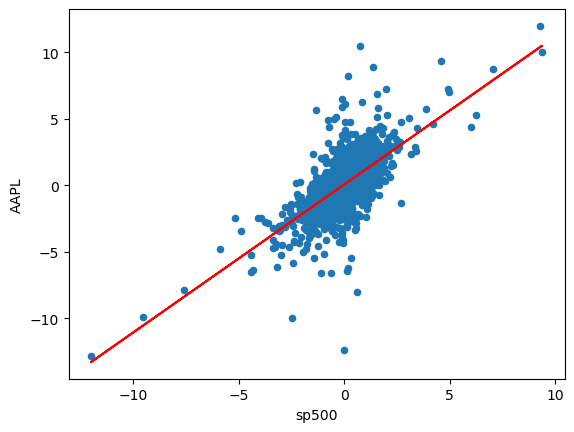

In [54]:
# Now let's plot the scatter plot and the straight line on one plot

Daily_Returns.plot(kind = 'scatter', x = 'sp500', y= 'AAPL')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha

plt.plot(Daily_Returns['sp500'], beta*Daily_Returns['sp500'] + alpha, '-', color = 'red')

In [57]:
#Calculate Beta for Tesla Inc. and compare it with AAPL Stocks

# Drop rows with NaN values in the relevant columns
clean_data = Daily_Returns[['sp500', 'TSLA']].dropna()

# Calculate beta and alpha using linear regression
beta_Tesla, alpha_Tesla = np.polyfit(clean_data['sp500'], clean_data['TSLA'], 1)

print(f"Beta for Daily_Returns['TSLA'] is {beta_Tesla} and alpha is {alpha_Tesla} ")

Beta for Daily_Returns['TSLA'] is 1.2686113556558822 and alpha is 0.17591658245946423 


In [ ]:
# Let's calculate the average daily rate of return for S&P500

Daily_Returns['sp500'].mean()

In [62]:
# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) and there are 9 market holidays in US
# Check your answers with: https://dqydj.com/sp-500-return-calculator/

rm = Daily_Returns['sp500'].mean()*252
rm

12.433392529685191

In [63]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate

# Calculate return for any security (APPL) using CAPM  

rf = 0

In [64]:
ER_AAPL = rf + (beta* (rm - rf))

print(f"The expected return for Apple stocks is {ER_AAPL}")

The expected return for Apple stocks is 13.837014590263422


In [65]:
rm_TSLA = Daily_Returns['TSLA'].mean()*252

rm_TSLA 

60.10412173227062

In [66]:
ER_TSLA = rf + (beta_Tesla* (rm_TSLA - rf))

print(f"The expected return for Apple stocks is {ER_TSLA}")

The expected return for Apple stocks is 76.248771351282


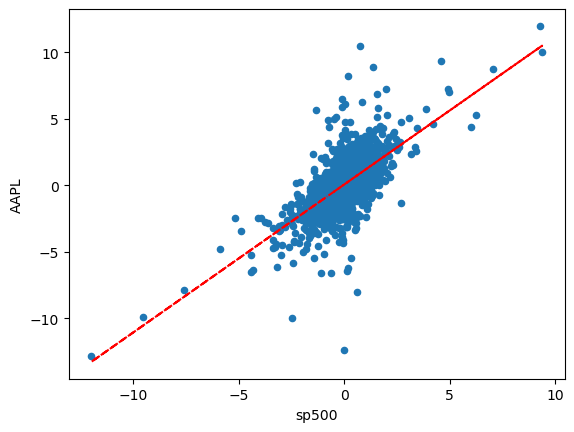

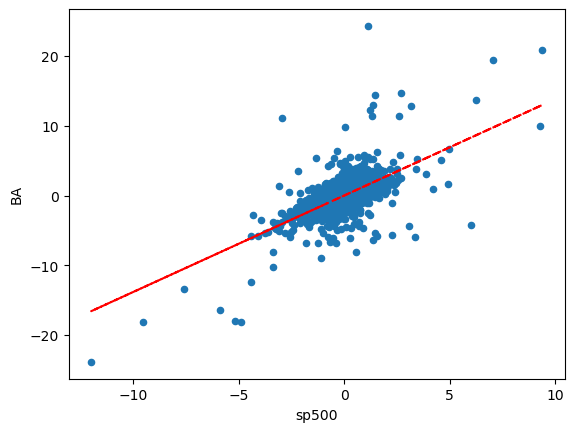

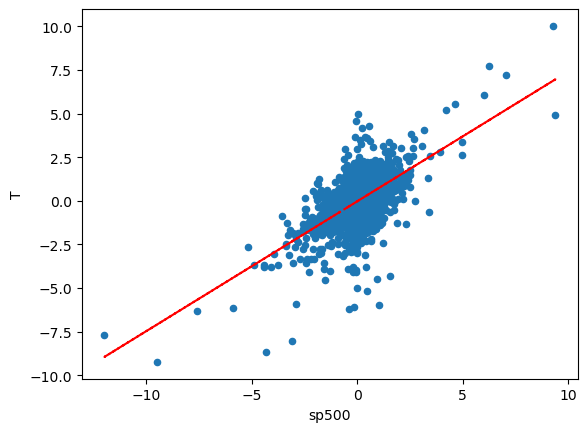

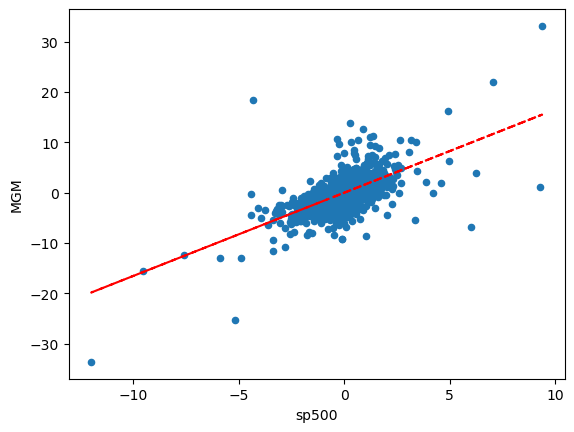

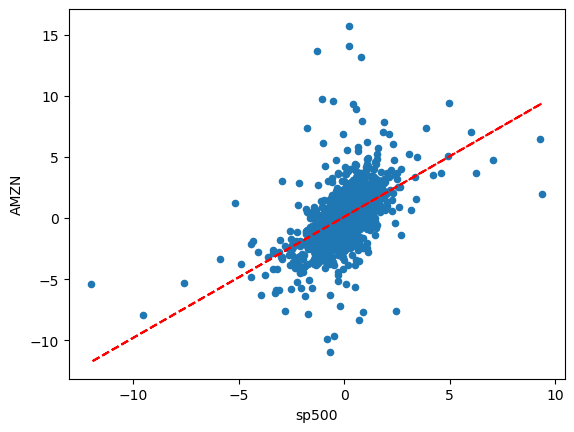

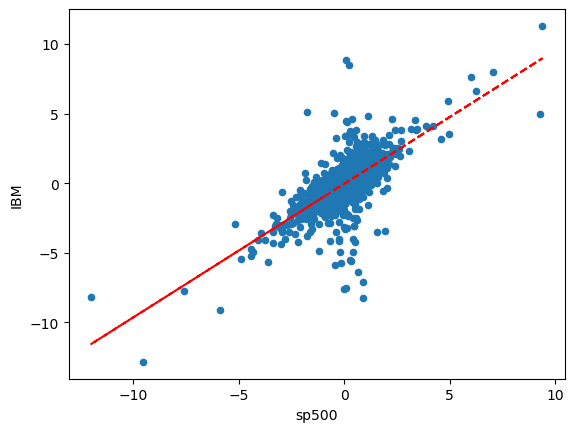

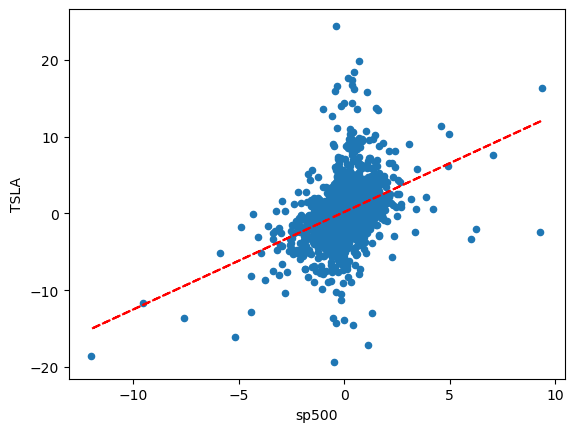

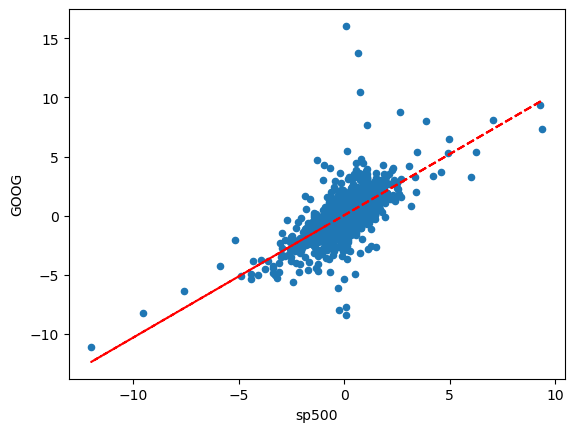

In [68]:
#CALCULATE BETA FOR ALL STOCKS

beta = {}

alpha= {}

for i in Daily_Returns.columns:
    if i !='Date' and i !='sp500':
        
        # Drop rows with NaN in either 'sp500' or the current stock column
        temp_df = Daily_Returns[['sp500', i]].dropna()
        
        temp_df.plot(kind = 'scatter', x = 'sp500', y = i)
        b, a = np.polyfit(temp_df['sp500'], temp_df[i], 1)
        plt.plot(temp_df['sp500'], b*temp_df['sp500'] + a, '--', color = 'red')

        beta[i] = b

        alpha[i] = a

    plt.show()

In [69]:
#Let's see beta for every stock

beta

{'AAPL': 1.1128913172512676,
 'BA': 1.3828672486978586,
 'T': 0.7446299391209864,
 'MGM': 1.6535680574526663,
 'AMZN': 0.9917324469003787,
 'IBM': 0.9604160257868405,
 'TSLA': 1.2686113556558822,
 'GOOG': 1.0348810754991689}

Text(0.5, 1.0, 'Beta of Stocks vs S&P 500')

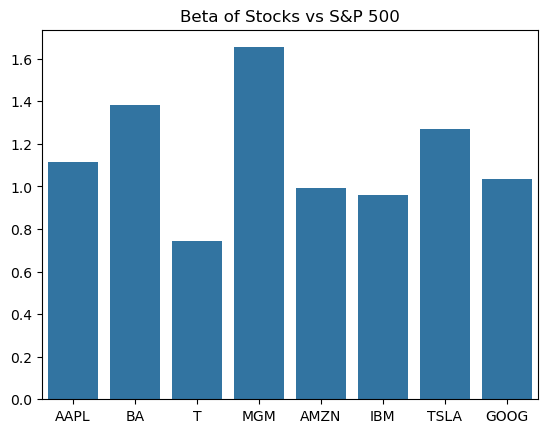

In [70]:
import seaborn as sns
sns.barplot(x=list(beta.keys()), y=list(beta.values()))
plt.title('Beta of Stocks vs S&P 500')


In [71]:
alpha

{'AAPL': 0.052836611548667714,
 'BA': -0.0022917621700550704,
 'T': -0.028576695554182078,
 'MGM': -0.016893147351191448,
 'AMZN': 0.10226143412733801,
 'IBM': -0.0534797669126437,
 'TSLA': 0.17591658245946423,
 'GOOG': 0.03337107813178214}

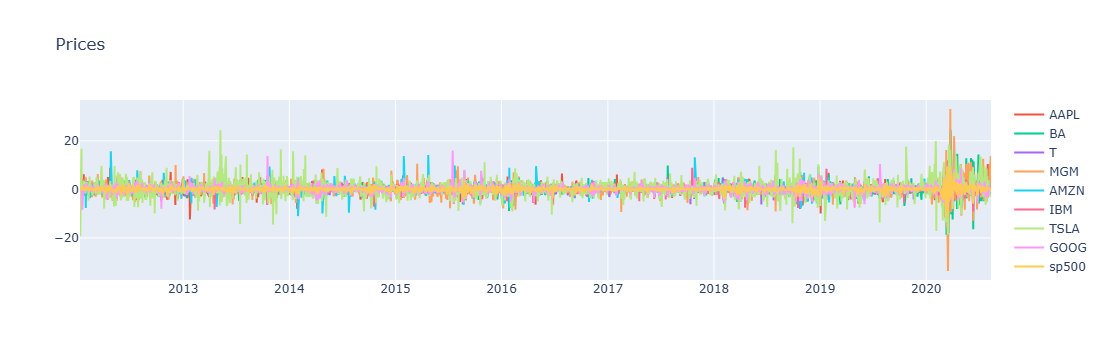

In [72]:
#Using Plotly Express, plot an interactive plot showing S&P500 daily returns vs. every stock
#Plot the best fit straight line (with Alpha and Beta values)

interactive_plot(Daily_Returns, 'Prices')

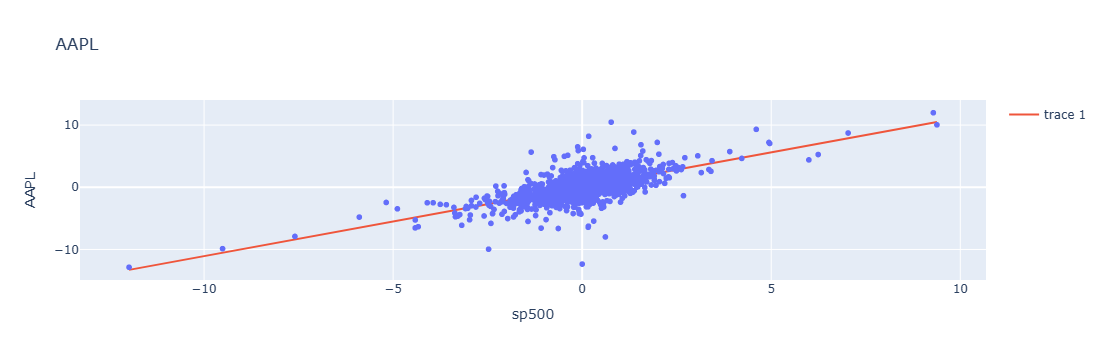

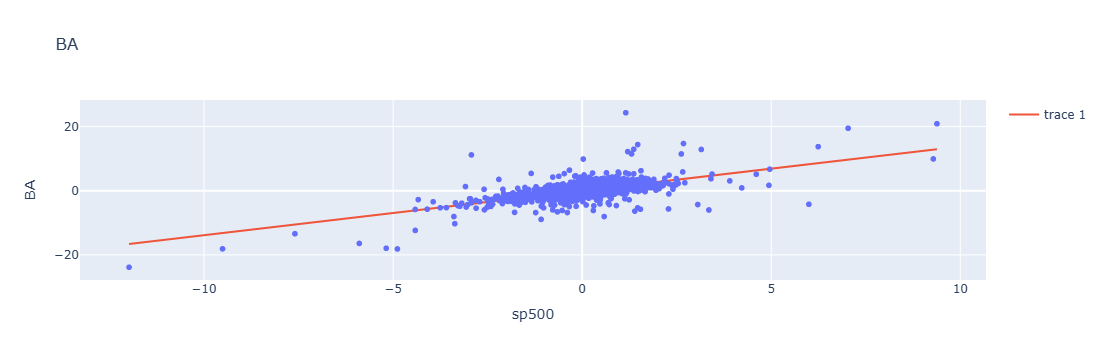

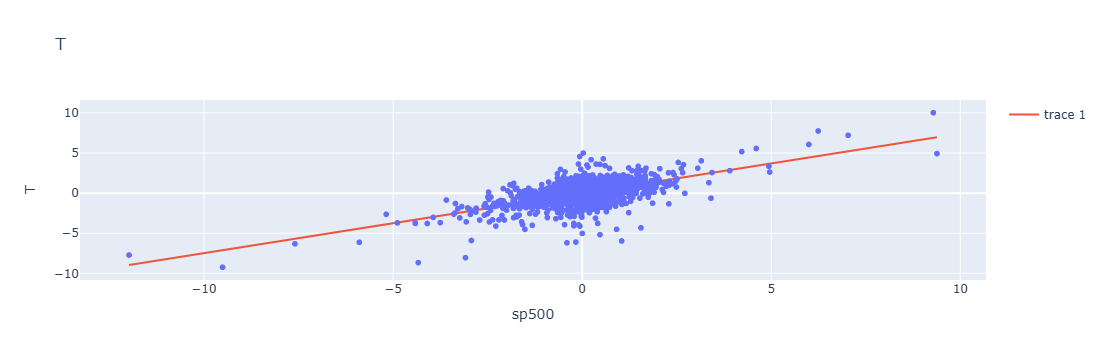

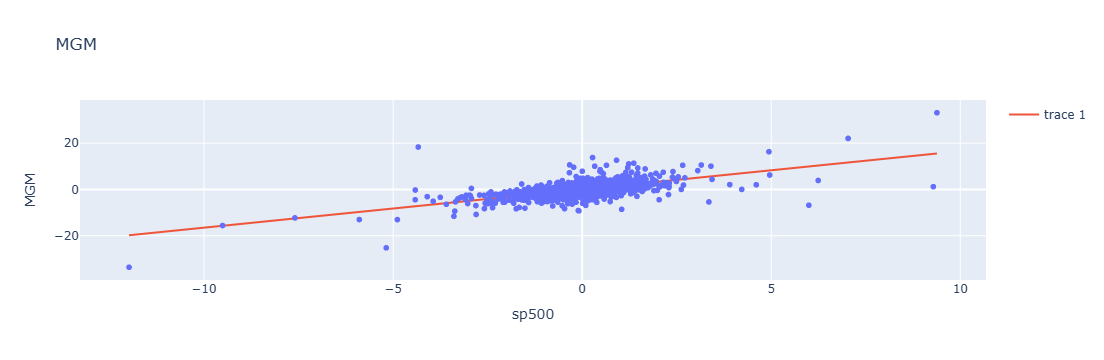

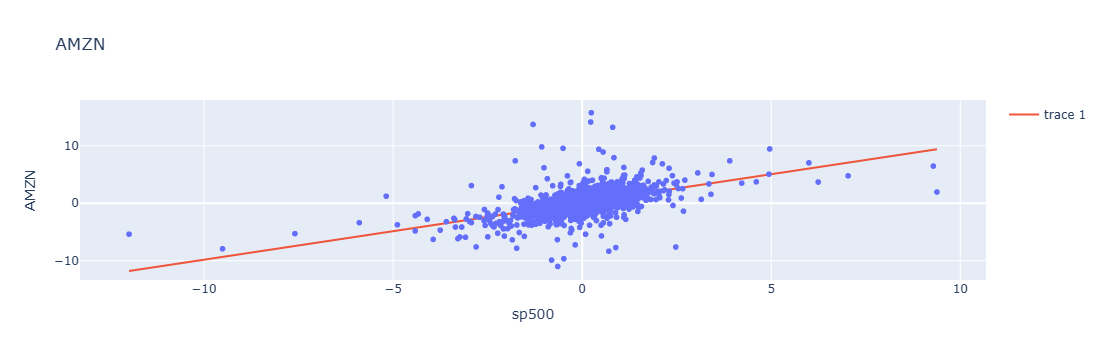

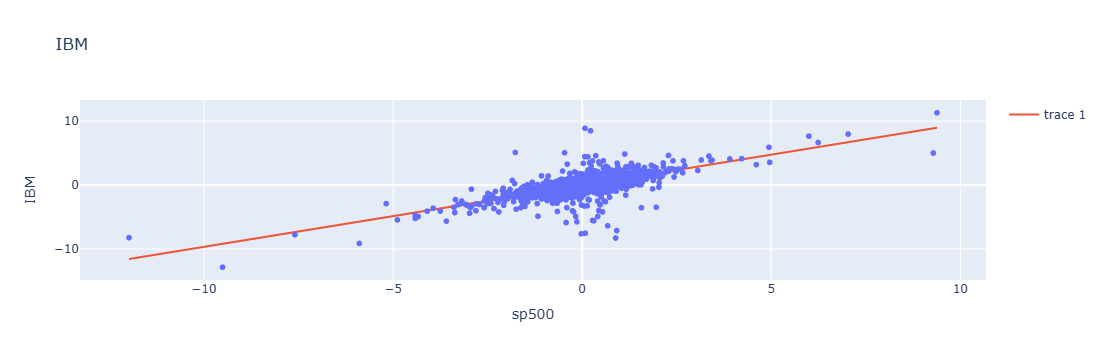

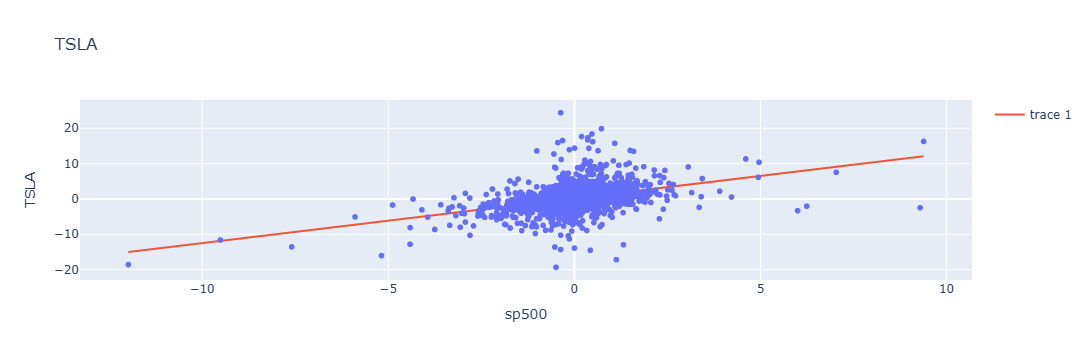

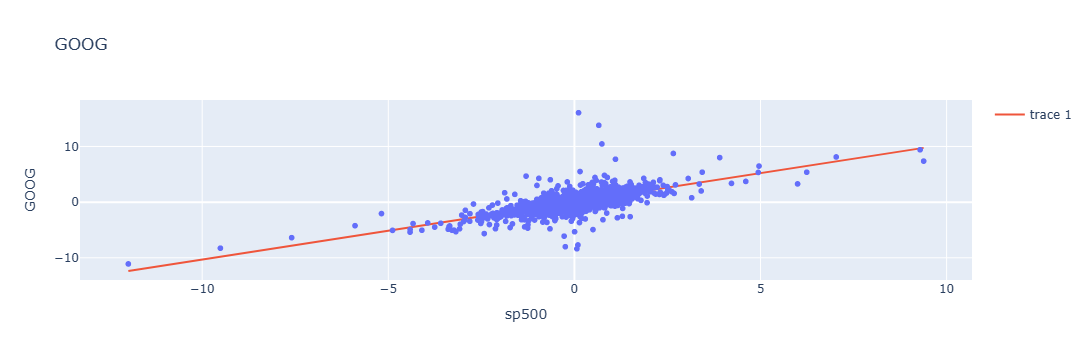

In [74]:
for i in Daily_Returns.columns:
    if i != 'Date' and i != 'sp500':
        df2 = Daily_Returns[['sp500', i]].dropna()
        
        fig = px.scatter(df2, x = 'sp500', y = i, title = i)
        b, a = np.polyfit(df2['sp500'], df2[i], 1)
        fig.add_scatter(x = df2['sp500'], y = (b*df2['sp500']) + a)
        fig.show()

In [75]:
#Obtain list of all stocks' names

beta.keys()

dict_keys(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG'])

In [76]:
beta.values()

dict_values([1.1128913172512676, 1.3828672486978586, 0.7446299391209864, 1.6535680574526663, 0.9917324469003787, 0.9604160257868405, 1.2686113556558822, 1.0348810754991689])

In [77]:
stock_names = list(beta.keys())

stock_names

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [78]:
#Define the expected return dictonary

Expected_Return = {}

rf = 0

rm = Daily_Returns['sp500'].mean()*252

rm

12.433392529685191

In [79]:
for i in stock_names:
    Expected_Return[i] = rf + (beta[i]*(rm - rf))

In [80]:
for i in stock_names:
    print(f"The expected return for {i} based on CAPM is {Expected_Return[i]} %")

The expected return for AAPL based on CAPM is 13.837014590263422 %
The expected return for BA based on CAPM is 17.19373131950627 %
The expected return for T based on CAPM is 9.258276322446811 %
The expected return for MGM based on CAPM is 20.559460732858035 %
The expected return for AMZN based on CAPM is 12.330598796737583 %
The expected return for IBM based on CAPM is 11.941229440408042 %
The expected return for TSLA based on CAPM is 15.77314295248565 %
The expected return for GOOG based on CAPM is 12.867082633223943 %


In [81]:
np.ones(8)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [82]:
#Let's assume equal weights for all 8 stocks

portfolio_stocks = (1/8)*np.ones(8)

portfolio_stocks

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [ ]:
Expected_Return.values()

In [83]:
# Calculate the expected return of entire portfolio based on equal weight distribution

ER = sum(list(Expected_Return.values())*portfolio_stocks)

ER

14.220067098491219

In [86]:
#Calculate the expected return for the portfolio assuming we only have 50% allocation in Apple and 50% in Amazon

ER1 = 0.5*(Expected_Return['AAPL']) + 0.5*(Expected_Return['AMZN'])

ER1

13.083806693500502